In [1]:
import neptune as neptune
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.ticker as mticker

from misc import plot_module, plot_multiple_modules, get_steps_from_first_run, pivot_dict, plot_loss_vs_lr

## Neptune

In [9]:
def get_neptune_table(tags, negative_tags=None, columns=None):
    """
    Fetches a Neptune runs table filtered by tags and returns it as a pandas DataFrame.

    Parameters:
    - tags (list): List of tags to filter the runs.
    - negative_tags (list, optional): List of tags to exclude from the runs.
    - columns (list, optional): Additional columns to include in the runs table.

    Returns:
    - pandas.DataFrame: The runs table with the specified filters and columns.
    """

    # Initialize the Neptune project
    project = neptune.init_project(
        project="pmtest/llm-random",
        mode="read-only",
        api_token=os.environ["NEPTUNE_API_TOKEN"],
    )

    # Fetch the runs table with the specified tags and columns
    runs_table = project.fetch_runs_table(tag=tags, columns=columns).to_pandas()

    # Ensure 'sys/tags' is a list for each run
    runs_table["sys/tags"] = runs_table["sys/tags"].apply(
        lambda x: x.split(",") if isinstance(x, str) else x
    )

    # Exclude runs containing any of the negative tags
    if negative_tags:
        for neg_tag in negative_tags:
            runs_table = runs_table[
                ~runs_table["sys/tags"].apply(lambda x: neg_tag in x)
            ]

    print(f"Table downloaded\nShape: {runs_table.shape}")
    return runs_table


def get_activations(runs_table):
    activation_dict = {}
    for i, run_row in runs_table.iterrows():
        # dmodel = 2 ** (i + 4)
        dmodel = run_row["args/dmodel"]
        run_id = run_row["sys/id"]  # Assuming 'sys/id' is the run identifier
        print(f"run ID: {run_id}")
        project_name = "pmtest/llm-random"
        # run_id = "LLMRANDOM-2078"
        run = neptune.init_run(
            project=project_name,
            with_id=run_id,
            mode="read-only",
            api_token=os.environ["NEPTUNE_API_TOKEN"],
        )
        print(f'run keys\n{run["block_0/residual_attention"]}')
        single_run_data = {"dmodel": dmodel}
        print(f'n_blocks: {run["args/n_blocks"].fetch()}')
        for i in range(run_row["args/n_blocks"]):
            single_run_data[i] = {
                "attn": run[
                    f"block_{i}/residual_attention/muP/mean_abs_update"
                ].fetch_values(),
                "FF": run[
                    f"block_{i}/residual_feedforward/muP/mean_abs_update"
                ].fetch_values(),
            }
        single_run_data["UNKNOWN"] = {
            "embedding": run[
                f"block_UNKNOWN/embedding_layer/muP/mean_abs_update"
            ].fetch_values(),
            "head": run[f"block_UNKNOWN/head/muP/mean_abs_update"].fetch_values(),
        }
        activation_dict[run_id] = single_run_data
    return activation_dict



## Plot

https://app.neptune.ai/pmtest/llm-random/
Table downloaded
Shape: (45, 608)
(45, 608)


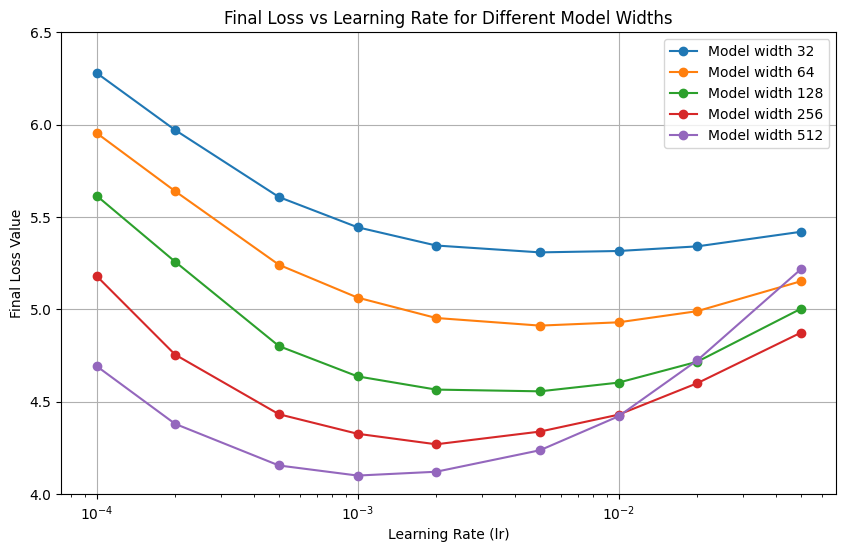

In [3]:
tags = ['muP_MoE', 'test_grid']

df = get_neptune_table(tags)
print(df.shape)
plot_loss_vs_lr(df, (4, 6.5))

In [4]:
tags = ['muP_MoE', 'mup_grid_2', 'weight_decay=0.01']

df = get_neptune_table(tags)
print(df.shape)

https://app.neptune.ai/pmtest/llm-random/
Table downloaded
Shape: (35, 527)
(35, 527)


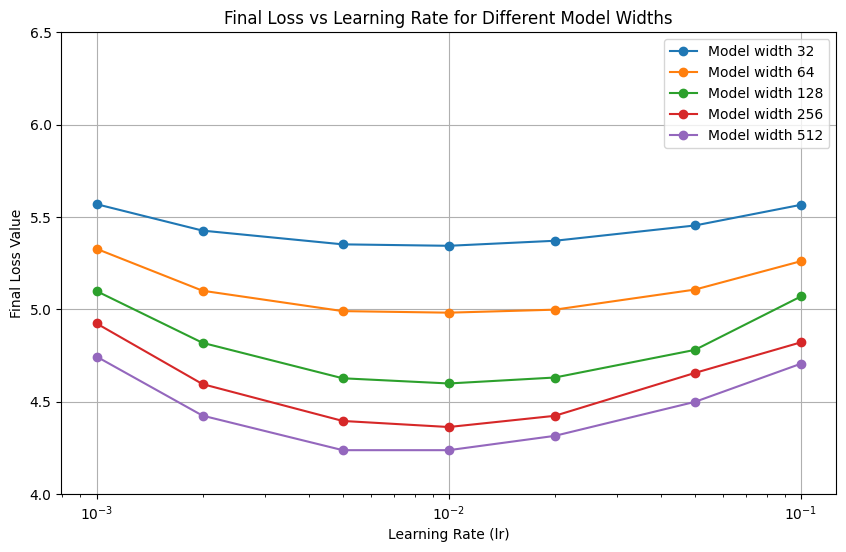

In [5]:
plot_loss_vs_lr(df, (4, 6.5))

In [6]:
# tags = ['muP_MoE', 'extrapolation']
# tags = ['muP_MoE', 'mup_grid_2', 'weight_decay=0.01', 'learning_rate=1e-2']
tags = ['muP_MoE', '10_step']

df = get_neptune_table(tags)
print(df.shape)

https://app.neptune.ai/pmtest/llm-random/
Table downloaded
Shape: (5, 259)
(5, 259)


In [10]:
act_dict = get_activations(df)
print(act_dict)


run ID: LLMRANDOM-25212
https://app.neptune.ai/pmtest/llm-random/e/LLMRANDOM-25212
run keys
<Namespace field at "block_0/residual_attention">
n_blocks: 4


MissingFieldException: 
[95m
----MissingFieldException-------------------------------------------------------
[0m
The field "block_UNKNOWN/embedding_layer/muP/mean_abs_update" was not found.

There are two possible reasons:
    - There is a typo in the path. Double-check your code for typos.
    - You are fetching a field that another process created, but the local representation is not synchronized.
    If you are sending metadata from multiple processes at the same time, synchronize the local representation before fetching values:
        [96mrun.sync()[0m

[92mNeed help?[0m-> https://docs.neptune.ai/getting_help


In [ ]:
steps = get_steps_from_first_run(act_dict)
# layer_num = 'UNKNOWN'
# module='head'
layer_num = 3
module='FF'
# pivoted_dict = pivot_dict(
#     activations_dict=act_dict,
#     steps=steps,
#     dmodels=[32, 64, 128, 256, 512],
#     layer_num=layer_num,
#     module=module,
# )
# plot_module(
#     pivoted_dict=pivoted_dict,
#     module_keyword=module,
#     layer_num=layer_num,
#     step_interval=5000
# )

dmodel 32 from run LLMRANDOM-25203 not in specified dmodels list.
dmodel 32 from run LLMRANDOM-25203 not in specified dmodels list.
dmodel 32 from run LLMRANDOM-25203 not in specified dmodels list.
dmodel 32 from run LLMRANDOM-25203 not in specified dmodels list.
dmodel 32 from run LLMRANDOM-25203 not in specified dmodels list.
dmodel 32 from run LLMRANDOM-25203 not in specified dmodels list.
dmodel 32 from run LLMRANDOM-25203 not in specified dmodels list.
dmodel 32 from run LLMRANDOM-25203 not in specified dmodels list.
dmodel 32 from run LLMRANDOM-25203 not in specified dmodels list.
dmodel 32 from run LLMRANDOM-25203 not in specified dmodels list.
dmodel 32 from run LLMRANDOM-25203 not in specified dmodels list.
dmodel 32 from run LLMRANDOM-25203 not in specified dmodels list.
dmodel 32 from run LLMRANDOM-25203 not in specified dmodels list.
dmodel 32 from run LLMRANDOM-25203 not in specified dmodels list.
dmodel 32 from run LLMRANDOM-25203 not in specified dmodels list.
dmodel 32 

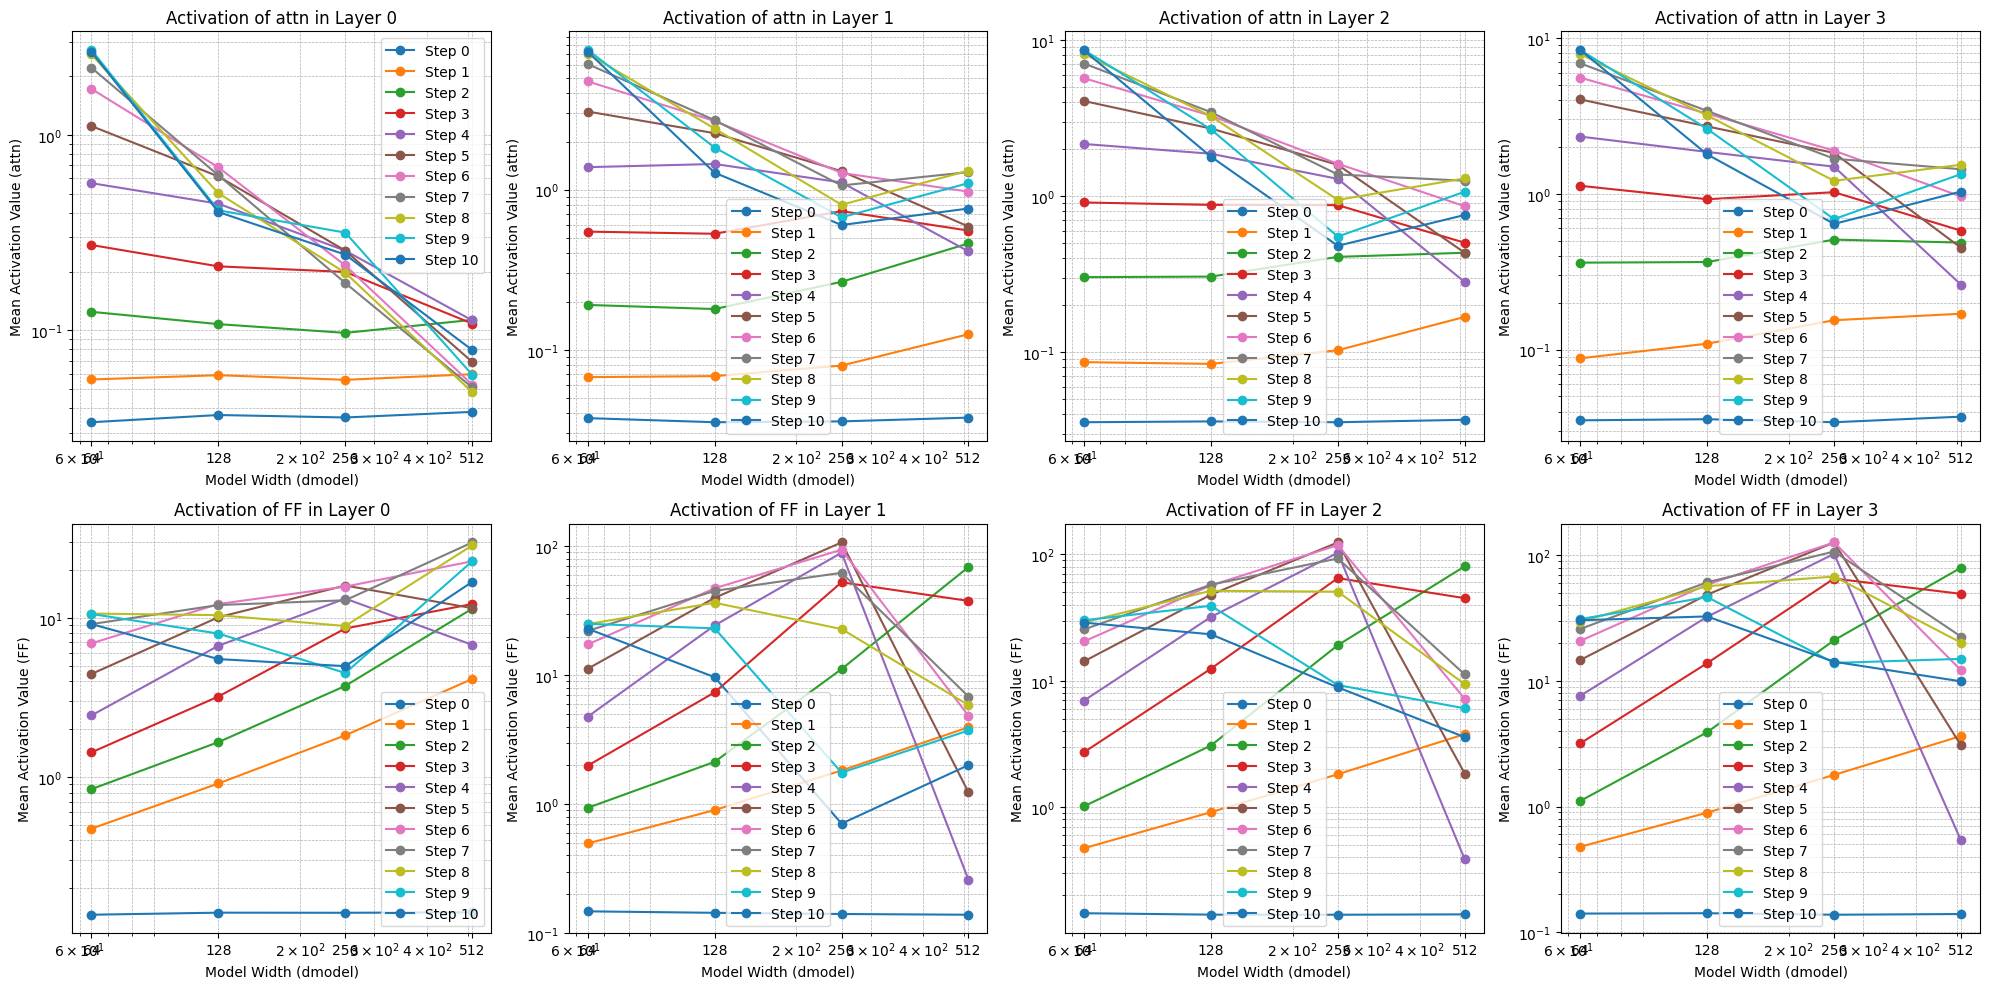

In [ ]:
plot_multiple_modules(
    activations_dict=act_dict,
    module_keywords=['attn', 'FF'],
    layer_nums=[0, 1, 2, 3],
    step_interval=1,
    figsize=(20, 10),
    dmodels=[64, 128, 256, 512],
)

In [ ]:
import torch

def truncated_normal_(tensor, mean=0.0, std=1.0, lower=-2.0, upper=2.0):
    """
    Initializes a tensor with truncated normal distribution.

    Args:
        tensor (torch.Tensor): Tensor to be initialized.
        mean (float): Mean of the normal distribution.
        std (float): Standard deviation of the normal distribution.
        lower (float): Lower bound of truncation.
        upper (float): Upper bound of truncation.
    """
    # Calculate the bounds in standard deviations
    lower_bound = (lower - mean) / std
    upper_bound = (upper - mean) / std
    
    # Use torch's trunc_normal_ if available
    with torch.no_grad():
        size = tensor.shape
        truncated = torch.fmod(
            torch.normal(mean=mean, std=std, size=size),
            upper_bound - lower_bound
        )
        tensor.copy_(torch.clamp(truncated, min=lower, max=upper))

# Example usage
v = 100
d = 5
x = torch.zeros(v)
x[5] += 1.0
print(f'x[:10] = {x[:10]}')
matrix = torch.empty(v, d)  # Create an empty 5x5 tensor
std_base = 1.0
truncated_normal_(matrix, mean=0.0, std=std_base, lower=-2.0, upper=2.0)
print(f'base norm: {torch.norm(x@matrix)/np.sqrt(d)}\tstd: {torch.std(x@matrix)}')

e = 1000
# x = torch.rand(v)
matrix = torch.empty(v, e)  # Create an empty 5x5 tensor
m_d = e / d
truncated_normal_(matrix, mean=0.0, std=std_base, lower=-2.0, upper=2.0)
# matrix *= (1 / np.sqrt(m_d))
print(f'extrpl norm: {torch.norm(x@matrix)/np.sqrt(e)}\tstd: {torch.std(x@matrix)}')


x[:10] = tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])
base norm: 0.9758264422416687	std: 0.9501935839653015
extrpl norm: 0.9635883569717407	std: 0.9638060927391052


In [ ]:
def grid_time(exp_time, num_exps, num_gpus):
    grid_time_on_1_gpu = exp_time * num_exps
    print(f'grid_time_on_1_gpu: {grid_time_on_1_gpu}')
    total_time = grid_time_on_1_gpu / num_gpus
    return total_time

exp_time = 3.5 / 60
num_exps = 6 * 5**3
num_gpus = 8

print(f'num exps: {num_exps}')
total_time = grid_time(exp_time=exp_time, num_exps=num_exps, num_gpus=num_gpus)
print(f'grid time: {total_time:.2f} h')

num exps: 750
grid_time_on_1_gpu: 43.75
grid time: 5.47 h
